<a href="https://colab.research.google.com/github/hsnaydos11/Fruit-Recognition-with-Deep-Learning/blob/main/last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install memory-profiler

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import shutil


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split



from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam


import time
import psutil  # For memory usage
import numpy as np
from sklearn.metrics import accuracy_score
from memory_profiler import profile


from tensorflow.keras.applications import VGG16

In [ ]:
data_dir = '/content/drive/MyDrive/Deep Learning Final'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1709

In [ ]:
#sınıflardaki fotoğraflar etiketleme işlemi
fruit_images_dict = {
    'apple' : list(data_dir.glob('apple/*')),
    'orange' : list(data_dir.glob('orange/*')),
    'mandarin' : list(data_dir.glob('mandarin/*')),
    'banana' : list(data_dir.glob('banana/*'))
}
fruit_labels_dict = {
    'apple': 0,
    'orange' : 1,
    'mandarin' :2,
    'banana' :3
}

In [ ]:
#boyutlandırma işlemi

X, y = [], []

for fruit_name, images in fruit_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(fruit_labels_dict[fruit_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Veri setini eğitim ve test kümelerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#normalizasyon işlemi
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
import tracemalloc
# memory usage kontrolü
tracemalloc.start()

num_classes = 5

model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# eğitim zamanını ve hafıza kullanımını hesaplama
start_time = time.time()
start_memory = tracemalloc.get_traced_memory()

history =  model.fit(X_train_scaled, y_train, epochs=10, batch_size=16)

end_time = time.time()
end_memory = tracemalloc.get_traced_memory()
training_time = end_time - start_time
memory_usage = end_memory[0] - start_memory[0]

print(f"Training Time: {training_time} seconds")
print(f"Memory Usage: {memory_usage / (1024 ** 2)} MB")  # Convert to megabytes
tracemalloc.stop()

Epoch 1/10
89/89 [==============================] - 15s 41ms/step - loss: 0.7815 - accuracy: 0.7684
Epoch 2/10
89/89 [==============================] - 3s 31ms/step - loss: 0.4116 - accuracy: 0.8626
Epoch 3/10
89/89 [==============================] - 3s 31ms/step - loss: 0.4186 - accuracy: 0.8683
Epoch 4/10
89/89 [==============================] - 3s 31ms/step - loss: 0.3501 - accuracy: 0.8839
Epoch 5/10
89/89 [==============================] - 3s 35ms/step - loss: 0.2968 - accuracy: 0.8980
Epoch 6/10
89/89 [==============================] - 3s 35ms/step - loss: 0.4112 - accuracy: 0.8725
Epoch 7/10
89/89 [==============================] - 3s 32ms/step - loss: 0.2859 - accuracy: 0.9065
Epoch 8/10
89/89 [==============================] - 3s 31ms/step - loss: 0.2336 - accuracy: 0.9285
Epoch 9/10
89/89 [==============================] - 3s 31ms/step - loss: 0.2316 - accuracy: 0.9221
Epoch 10/10
89/89 [==============================] - 3s 32ms/step - loss: 0.1734 - accuracy: 0.9363
Training

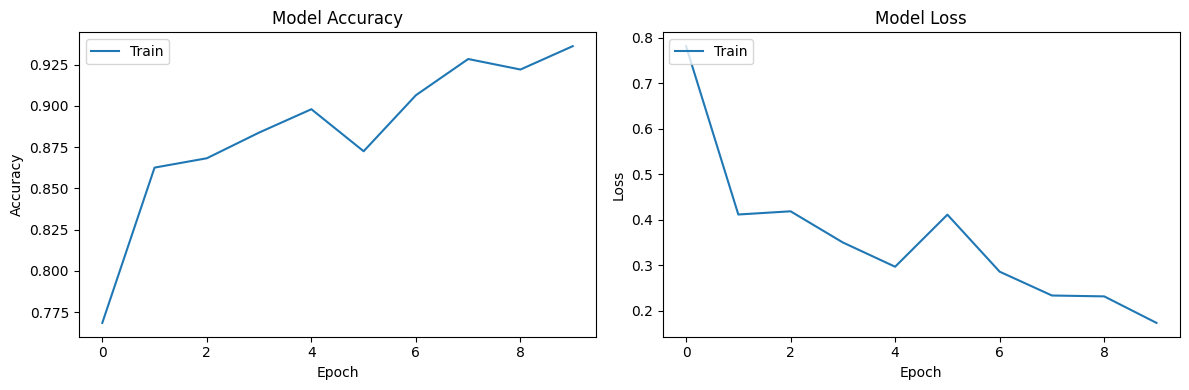

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy değerlerinin gösterimi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Training & Validation Loss değerlerinin gösterimi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(X_test_scaled,y_test)

12/12 [==============================] - 2s 40ms/step - loss: 0.1175 - accuracy: 0.9548


[0.11749448627233505, 0.9548022747039795]

In [ ]:
predictions = model.predict(X_test_scaled)

predictions

12/12 [==============================] - 0s 20ms/step


array([[ 0.05946507, -4.4709787 , -3.4296184 ,  8.817787  ,  0.6284381 ],
       [-1.2515095 ,  4.7686214 , -2.0759354 , -2.9992442 , -1.7028085 ],
       [-0.13016433, -3.7825117 , -4.241296  ,  7.8343844 ,  0.03508902],
       ...,
       [ 0.15957834, -4.6526203 , -3.26123   ,  8.875517  ,  0.73018086],
       [-1.1878471 ,  5.0515985 , -1.1706886 , -4.2200627 , -1.7407905 ],
       [-2.5882993 ,  3.8043275 ,  0.96605027, -0.33177778, -1.9615186 ]],
      dtype=float32)

YOLO MODELİYLE MEYVE TESPİT

In [ ]:
# VGG16 modelini kullanalım (Transfer Öğrenme)
base_model = VGG16(input_shape=(180, 180, 3), include_top=False, weights='imagenet')

# Önceden eğitilmiş katmanların ağırlıklarını dondurun
for layer in base_model.layers:
    layer.trainable = False

# Transfer Öğrenme modelini tasarlayalım
model_v2 = Sequential()
model_v2.add(base_model)
model_v2.add(layers.Flatten())
model_v2.add(layers.Dense(128, activation='relu'))
model_v2.add(layers.Dense(4, activation='softmax'))

# Modeli derleyelim
model_v2.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Training time ölçümü
start_time = time.time()
# Modeli eğitelim
history_v2 = model_v2.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test))
end_time = time.time()
end_memory = tracemalloc.get_traced_memory()
training_time = end_time - start_time
memory_usage = end_memory[0] - start_memory[0]  # in bytes

print(f"Training Time: {training_time} seconds")

# Memory usage ölçümü
print(f"Memory Usage: {memory_usage / (1024 ** 2)} MB")  # Convert to megabytes

# Model performansını değerlendirelim
test_loss, test_acc = model_v2.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

tracemalloc.stop()

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/10
45/45 [==============================] - 14s 184ms/step - loss: 0.4907 - accuracy: 0.8562 - val_loss: 0.1620 - val_accuracy: 0.9379
Epoch 2/10
45/45 [==============================] - 5s 116ms/step - loss: 0.0791 - accuracy: 0.9773 - val_loss: 0.1104 - val_accuracy: 0.9520
Epoch 3/10
45/45 [==============================] - 5s 108ms/step - loss: 0.0377 - accuracy: 0.9908 - val_loss: 0.0822 - val_accuracy: 0.9689
Epoch 4/10
45/45 [==============================] - 5s 115ms/step - loss: 0.0172 - accuracy: 0.9979 - val_loss: 0.0791 - val_accuracy: 0.9689
Epoch 5/10
45/45 [==============================] - 5s 117ms/step - loss: 0.0140 - accuracy: 0.9986 - val_loss: 0.0909 - val_accuracy: 0.9661
Epoch 6/10
45/45 [==============================] - 5s 109ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.0865 - val_accuracy: 0.9718
Epoch 7/10
45/45 [==============================] - 5s 116ms/step - loss: 0.0047 -

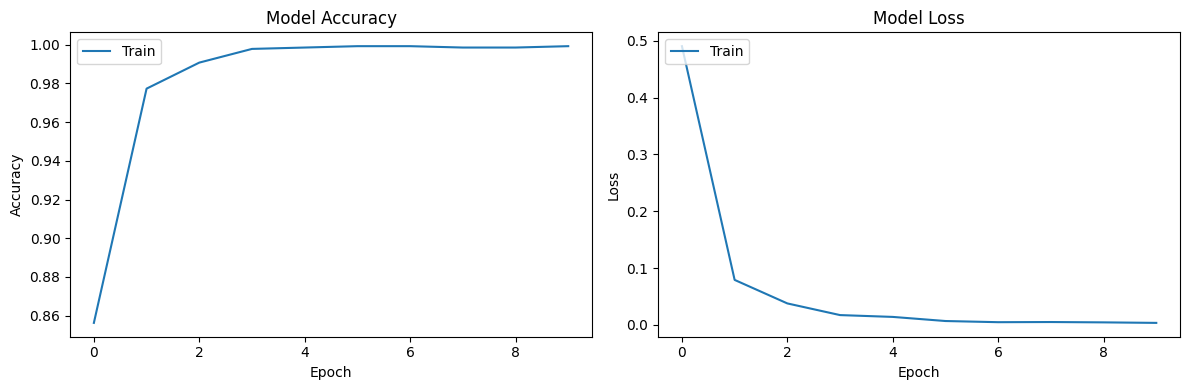

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

KAMERA BÖLÜMÜ

In [ ]:
def predict_fruit(frame):
    # Modelinize göre görüntüyü önişleme yapabilir ve tahminlerde bulunabilirsiniz.
    # Örnek olarak, resmi yeniden boyutlandırma ve normalleştirme işlemleri yapalım.
    resized_frame = cv2.resize(frame, (180, 180))
    normalized_frame = resized_frame / 255.0  # Örnek normalizasyon

    # Tahmin
    predictions = model.predict(np.expand_dims(normalized_frame, axis=0))

    # Sınıf indeksi
    predicted_class_index = np.argmax(predictions)

    # Sınıf etiketi
    class_labels = {0: 'Apple', 1: 'Orange', 2: 'Mandarin'}
    predicted_class_label = class_labels[predicted_class_index]

    # Görüntü üzerine sonuçları çizme
    cv2.putText(frame, f'Predicted Fruit: {predicted_class_label}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    return frame

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import base64

# JavaScript ile video akışını açma işlemi
def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8);
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            const modelOut = document.createElement('div');
            modelOut.innerHTML = "<span>Status:</span>";
            labelElement = document.createElement('span');
            labelElement.innerText = 'No data';
            labelElement.style.fontWeight = 'bold';
            modelOut.appendChild(labelElement);
            div.appendChild(modelOut);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            video.onclick = () => { shutdown = true; };
            stream = await navigator.mediaDevices.getUserMedia({ video: { facingMode: "environment" } });
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            imgElement.onclick = () => { shutdown = true; };
            div.appendChild(imgElement);

            const instruction = document.createElement('div');
            instruction.innerHTML = '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640;
            captureCanvas.height = 480;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label !== "") {
                labelElement.innerHTML = label;
            }

            if (imgData !== "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function (resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {
                'create': preShow - preCreate,
                'show': preCapture - preShow,
                'capture': Date.now() - preCapture,
                'img': result
            };
        }
        ''')

    display(js)

def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

# video_stream fonksiyonunu çağırarak video akışını başlatın
video_stream()

# etiket için video
label_html = 'Capturing...'
# başlangıçta bounding box'ı boş olarak başlat
bbox = ''
count = 0

# Tanınan meyveleri tanımla
class_labels = {0: 'Apple', 1: 'Orange', 2: 'Mandarin', 3: 'Banana'}

# Kamera görüntüsünü al ve göster
while True:
    # Her döngünün başında toplam meyve sayısını sıfırla
    total_fruit_count = 0


    # Başlangıç zamanını kaydet
    start_time = time.time()

    # JavaScript tarafından dönen veriyi işleme
    js_result = video_frame(label_html, bbox)['img']

    # Base64 kodlu görüntü verisini çözümleme
    image_data = base64.b64decode(js_result.split(',')[1])

    # Görüntüyü OpenCV ile açma
    frame = cv2.imdecode(np.frombuffer(image_data, np.uint8), -1)

    # Modelinizi kullanarak meyve tanıma işlemi
    # Bu kısmı modelinize ve veri ön işleme işlemlerinize göre özelleştirebilirsiniz
    resized_frame = cv2.resize(frame, (180, 180))
    normalized_frame = resized_frame / 255.0
    predictions = model.predict(np.expand_dims(normalized_frame, axis=0))
    predicted_class_index = np.argmax(predictions)

    # Tanınan meyveyi etiketle, tanımlı meyveler dışındakiler için "Tanımsız" etiketi ver
    predicted_class_label = class_labels.get(predicted_class_index, 'Tanımsız')

    # Görüntü üzerine sonuçları çizme
    cv2.putText(frame, f'Predicted Fruit: {predicted_class_label}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Görüntüyü göster
    cv2_imshow(frame)

    # Bitiş zamanını kaydet
    end_time = time.time()

    # Detection speed'i hesapla ve yazdır
    detection_speed = 1 / (end_time - start_time)
    print(f"Detection Speed: {detection_speed:.2f} frames per second")

      # 1 saniye beklet
    time.sleep(6)

    # Çıkış için 'q' tuşuna basılmasını bekleyin
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break